## Importing Relevent Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



## Loading The Data




In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Simple Linear Regression /Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
#defining the dependent and independent variables
y=data['Salary']
x1=data['YearsExperience']

### Exploring the Data

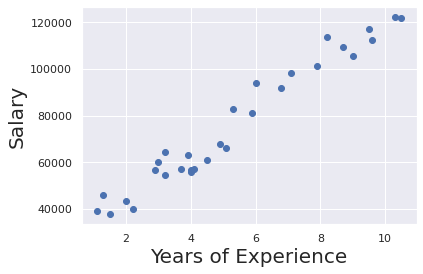

In [ ]:
plt.scatter(x1,y)
plt.xlabel('Years of Experience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()

## Linear Regression Using statsmodels

### Performing Linear Regression on the data and OLS Summary


In [ ]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        11:45:21   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plotting Regression Line using coefficients from OLS Summary

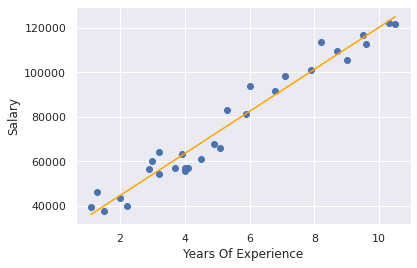

In [ ]:
plt.scatter(x1,y)
yhat=9449.9623*x1 +25790
fig=plt.plot(x1,yhat,c='orange',label='Regression Line')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

## Linear Regression Model using sklearn

### Reshaping Inputs 

In [ ]:
x1.shape

(30,)

In [ ]:
y.shape

(30,)

In [ ]:
# reshaping inputs
x1=x1.values.reshape(-1,1)
x1.shape

(30, 1)

### Regression Itself

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### R Squared

In [ ]:
reg.score(x1,y)

0.9569566641435084

### Coefficient And Intercept

In [ ]:
#Coefficient
reg.coef_

array([9449.96232146])

In [ ]:
#Intercept
reg.intercept_

25792.200198668696

### Train Test Split


In [ ]:
#Importing train_test_split from sklearn.model_selection to perform a train test split
from sklearn.model_selection import train_test_split
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=60)

In [ ]:
x1_train

array([[ 4. ],
       [ 3.2],
       [10.5],
       [ 1.1],
       [ 2.9],
       [ 5.1],
       [ 7.9],
       [ 8.7],
       [ 9.6],
       [ 5.9],
       [ 7.1],
       [ 4. ],
       [ 8.2],
       [ 9.5],
       [10.3],
       [ 1.5],
       [ 5.3],
       [ 3.2],
       [ 2. ],
       [ 4.9],
       [ 3.9],
       [ 3. ],
       [ 1.3],
       [ 4.1]])

In [ ]:
x1_test

array([[6.8],
       [4.5],
       [6. ],
       [9. ],
       [3.7],
       [2.2]])

In [ ]:
y_train

11     55794.0
7      54445.0
29    121872.0
0      39343.0
5      56642.0
16     66029.0
22    101302.0
24    109431.0
27    112635.0
18     81363.0
21     98273.0
12     56957.0
23    113812.0
26    116969.0
28    122391.0
2      37731.0
17     83088.0
8      64445.0
3      43525.0
15     67938.0
10     63218.0
6      60150.0
1      46205.0
13     57081.0
Name: Salary, dtype: float64

In [ ]:
y_test

20     91738.0
14     61111.0
19     93940.0
25    105582.0
9      57189.0
4      39891.0
Name: Salary, dtype: float64

In [ ]:
#Displaying the shapes of training and testing data
col = ['x1_train', 'x1_test', 'y_train', 'y_test']
data = [x1_train, x1_test, y_train, y_test]
for i in range(len(col)):
    print('Shape of {}: {}'.format(col[i],data[i].shape))

Shape of x1_train: (24, 1)
Shape of x1_test: (6, 1)
Shape of y_train: (24,)
Shape of y_test: (6,)


### Plotting Dataset Distribution














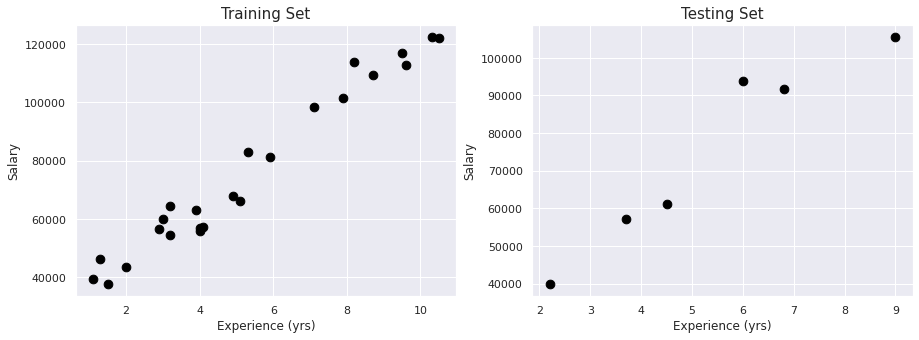

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(x1_train, y_train, s=75, color='black')
ax[0].set_xlabel('Experience (yrs)')
ax[0].set_ylabel('Salary')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(x1_test, y_test, s=75, color='black')
ax[1].set_xlabel('Experience (yrs)')
ax[1].set_ylabel('Salary')
plt.show()

### Modeling And Fitting


In [ ]:
reg=LinearRegression()
reg.fit(x1_train,y_train)
print(f'Coefficients: {reg.coef_}')
print(f'Intercepts: {reg.intercept_}')

Coefficients: [9335.93823414]
Intercepts: 26796.15235904466


### Plotting Regression Line

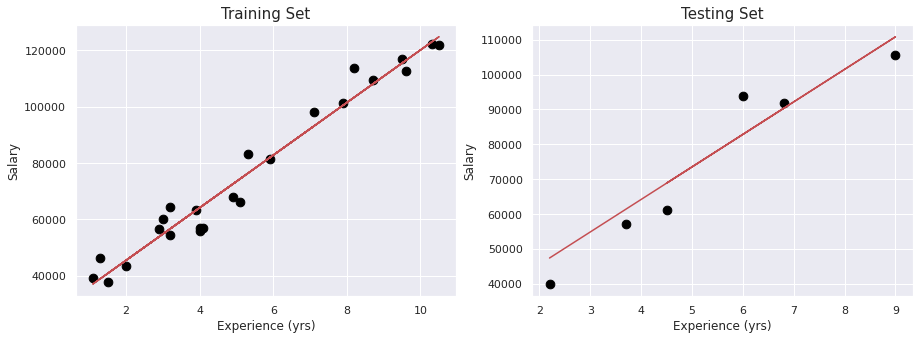

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(x1_train, y_train, s=75, color='black')
ax[0].plot(x1_train, reg.coef_*x1_train + reg.intercept_, '-r')
ax[0].set_xlabel('Experience (yrs)')
ax[0].set_ylabel('Salary')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(x1_test, y_test, s=75, color='black')
ax[1].plot(x1_test, reg.coef_*x1_test + reg.intercept_, '-r')
ax[1].set_xlabel('Experience (yrs)')
ax[1].set_ylabel('Salary')
plt.show()

### Making Predictions on the test data

In [ ]:
y_pred = np.round(reg.predict(x1_test))
my_df=pd.DataFrame({'Years Experience': x1_test[:,0], 'Actual Salary': y_test, 'Predicted Salary': y_pred})
my_df=my_df.reset_index(drop=True)
my_df

,Years Experience,Actual Salary,Predicted Salary
0,6.8,91738.0,90281.0
1,4.5,61111.0,68808.0
2,6.0,93940.0,82812.0
3,9.0,105582.0,110820.0
4,3.7,57189.0,61339.0
5,2.2,39891.0,47335.0


In [ ]:
#Predicting Salary of a Person with 15 years of experience
reg.predict([[15]])

array([166835.22587118])

### Calculating R-squared

In [ ]:
#Calculating R squared on training data
r2_train=reg.score(x1_train,y_train)
r2_train

0.9642298068583915

In [ ]:
#Calculating R squared on testing data
r2_test=reg.score(x1_test,y_test)
r2_test

0.9139925364405546

In [ ]:
#displaying R-squared
df_Train_Test=pd.DataFrame({'Training ':r2_train,'Testing ':r2_test},index=['R-squared'])
df_Train_Test

,Training,Testing
R-squared,0.96423,0.913993


## End of Simple Linear Regression Analysis.